## **World Cup**

### **Dataset Description**
Data from all World Cup results (1930-2014), details for each match (Date, Stage, City, Ref, Home Team, Away Team, Goals, Goals at Half, etc), and details for events (goals, assists, etc) by athlete.

In [2]:
# importing base libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly

In [4]:
# reading data
matches = pd.read_csv(r'E:\Personal\OneDrive\Git Projects\Portfolio Projects\Portfolio\Portfolio\Data Science & Analytics\_data\maven\world-cup\WorldCupMatches.csv')
players = pd.read_csv(r'E:\Personal\OneDrive\Git Projects\Portfolio Projects\Portfolio\Portfolio\Data Science & Analytics\_data\maven\world-cup\WorldCupPlayers.csv')

In [5]:
# checking data
matches.head()

,Year,Datetime,Stage,Stadium,City,Home Team Name,Home Team Goals,Away Team Goals,Away Team Name,Win conditions,Attendance,Half-time Home Goals,Half-time Away Goals,Referee,Assistant 1,Assistant 2,RoundID,MatchID,Home Team Initials,Away Team Initials
0,1930,1930-07-13 15:00:00,Group 1,Pocitos,Montevideo,France,4,1,Mexico,,4444.0,3,0,LOMBARDI Domingo (URU),CRISTOPHE Henry (BEL),REGO Gilberto (BRA),201,1096,FRA,MEX
1,1930,1930-07-13 15:00:00,Group 4,Parque Central,Montevideo,USA,3,0,Belgium,,18346.0,2,0,MACIAS Jose (ARG),MATEUCCI Francisco (URU),WARNKEN Alberto (CHI),201,1090,USA,BEL
2,1930,1930-07-14 12:45:00,Group 2,Parque Central,Montevideo,Yugoslavia,2,1,Brazil,,24059.0,2,0,TEJADA Anibal (URU),VALLARINO Ricardo (URU),BALWAY Thomas (FRA),201,1093,YUG,BRA
3,1930,1930-07-14 14:50:00,Group 3,Pocitos,Montevideo,Romania,3,1,Peru,,2549.0,1,0,WARNKEN Alberto (CHI),LANGENUS Jean (BEL),MATEUCCI Francisco (URU),201,1098,ROU,PER
4,1930,1930-07-15 16:00:00,Group 1,Parque Central,Montevideo,Argentina,1,0,France,,23409.0,0,0,REGO Gilberto (BRA),SAUCEDO Ulises (BOL),RADULESCU Constantin (ROU),201,1085,ARG,FRA


In [6]:
players.head()

,RoundID,MatchID,Team Initials,Coach Name,Line-up,Shirt Number,Player Name,Position,Event
0,201,1096,FRA,CAUDRON Raoul (FRA),S,0,Alex THEPOT,GK,NaN
1,201,1096,MEX,LUQUE Juan (MEX),S,0,Oscar BONFIGLIO,GK,NaN
2,201,1096,FRA,CAUDRON Raoul (FRA),S,0,Marcel LANGILLER,NaN,G40'
3,201,1096,MEX,LUQUE Juan (MEX),S,0,Juan CARRENO,NaN,G70'
4,201,1096,FRA,CAUDRON Raoul (FRA),S,0,Ernest LIBERATI,NaN,NaN


In [7]:
matches.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 852 entries, 0 to 851
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Year                  852 non-null    int64  
 1   Datetime              852 non-null    object 
 2   Stage                 852 non-null    object 
 3   Stadium               852 non-null    object 
 4   City                  852 non-null    object 
 5   Home Team Name        852 non-null    object 
 6   Home Team Goals       852 non-null    int64  
 7   Away Team Goals       852 non-null    int64  
 8   Away Team Name        852 non-null    object 
 9   Win conditions        852 non-null    object 
 10  Attendance            850 non-null    float64
 11  Half-time Home Goals  852 non-null    int64  
 12  Half-time Away Goals  852 non-null    int64  
 13  Referee               852 non-null    object 
 14  Assistant 1           852 non-null    object 
 15  Assistant 2           8

In [8]:
players.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37784 entries, 0 to 37783
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   RoundID        37784 non-null  int64 
 1   MatchID        37784 non-null  int64 
 2   Team Initials  37784 non-null  object
 3   Coach Name     37784 non-null  object
 4   Line-up        37784 non-null  object
 5   Shirt Number   37784 non-null  int64 
 6   Player Name    37784 non-null  object
 7   Position       4143 non-null   object
 8   Event          9069 non-null   object
dtypes: int64(3), object(6)
memory usage: 2.6+ MB


In [ ]:
# the players table is kinda overly normalized, so we'll need to denormalize a bit

In [9]:
# need to convert the datetime column to datetime
matches['Datetime'] = pd.to_datetime(matches['Datetime'])

## *How has attendance trended over time? (both average per game and total per year)*

Text(0.5, 1.0, 'Average Attendance by Year')

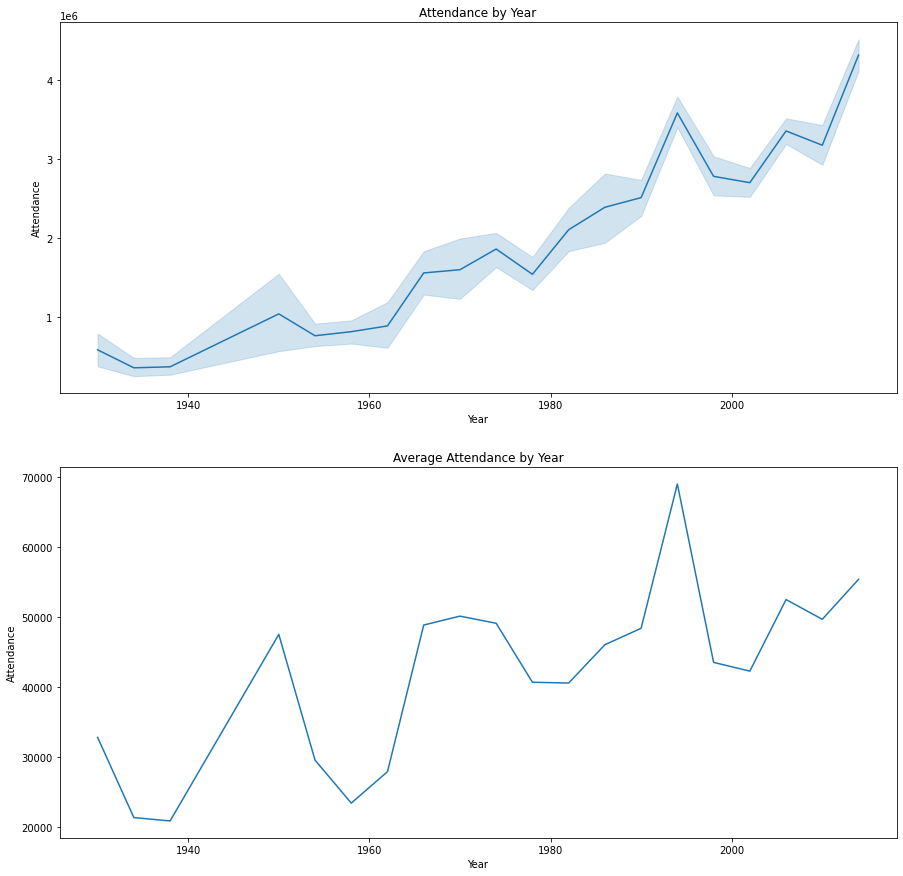

In [17]:
f, axes = plt.subplots(2, 1, figsize=(15, 15))

fig1 = sns.lineplot(x='Year', y='Attendance', data=matches, ax=axes[0], estimator=sum)
fig1.set_title('Attendance by Year')

# now we are going to plot average attendance per game by year
fig2 = sns.lineplot(x='Year', y='Attendance', data=matches.groupby('Year').mean().reset_index(), ax=axes[1])
fig2.set_title('Average Attendance by Year')


## *Do certain cities tend to draw bigger crowds?*

<AxesSubplot:ylabel='Attendance'>

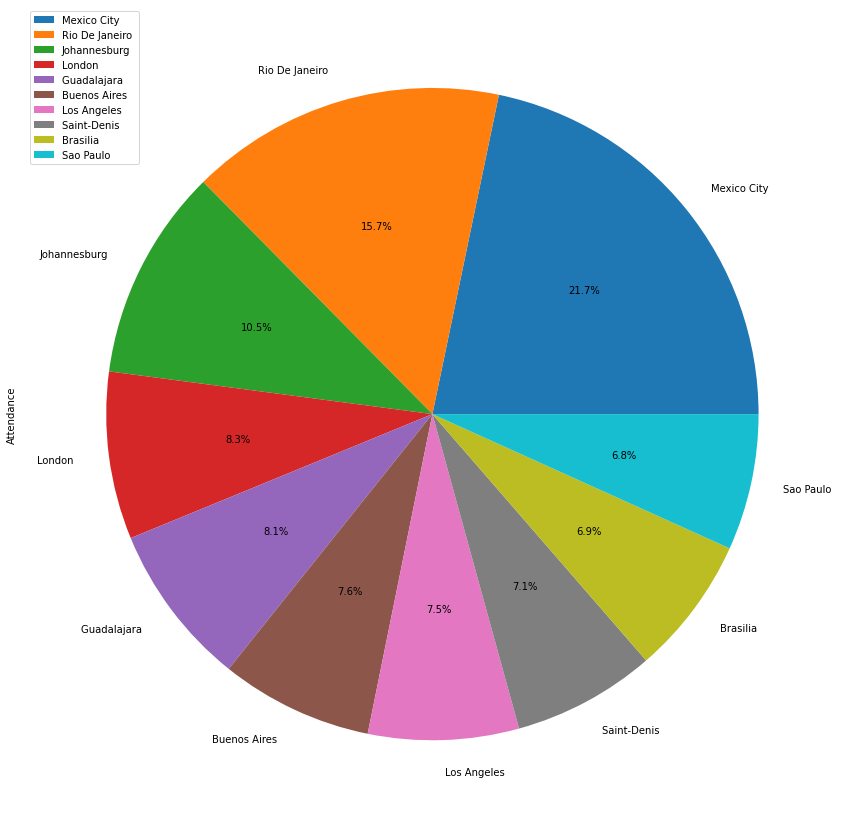

In [24]:
# plotting a pie chart of top 10 cites by attendance
f, ax = plt.subplots(figsize=(15, 15))

fig3 = matches.groupby('City').sum().sort_values('Attendance', ascending=False).head(10).plot.pie(y='Attendance', ax=ax, autopct='%1.1f%%')
#TODO: add white background to png so it looks better

## *Do certain teams see larger attendance?*

Text(0.5, 1.0, 'Top 10 Away Teams by Attendance')

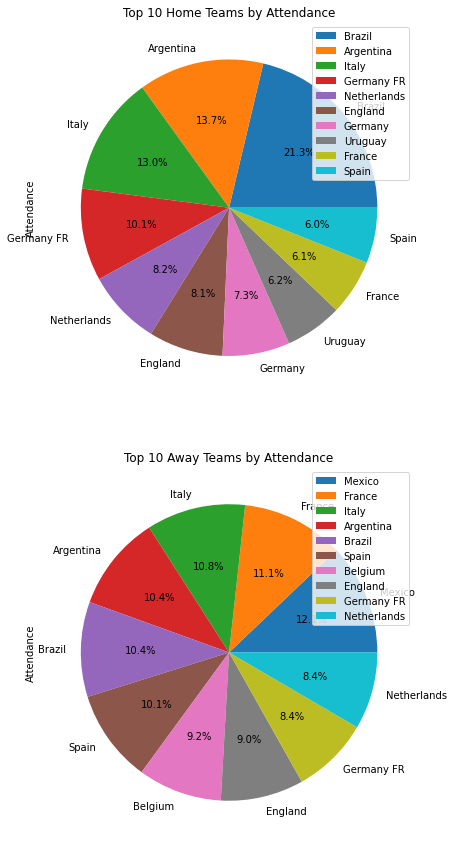

In [28]:
# plotting pie charts of top 10 teams by attendance
f, axes = plt.subplots(2, 1, figsize=(15, 15))
fig4 = matches.groupby('Home Team Name').sum().sort_values('Attendance', ascending=False).head(10).plot.pie(y='Attendance', ax=axes[0], autopct='%1.1f%%')
fig4.set_title('Top 10 Home Teams by Attendance')

fig5 = matches.groupby('Away Team Name').sum().sort_values('Attendance', ascending=False).head(10).plot.pie(y='Attendance', ax=axes[1], autopct='%1.1f%%')
fig5.set_title('Top 10 Away Teams by Attendance')

Text(0.5, 1.0, 'Top 10 Team Match Combinations by Attendance')

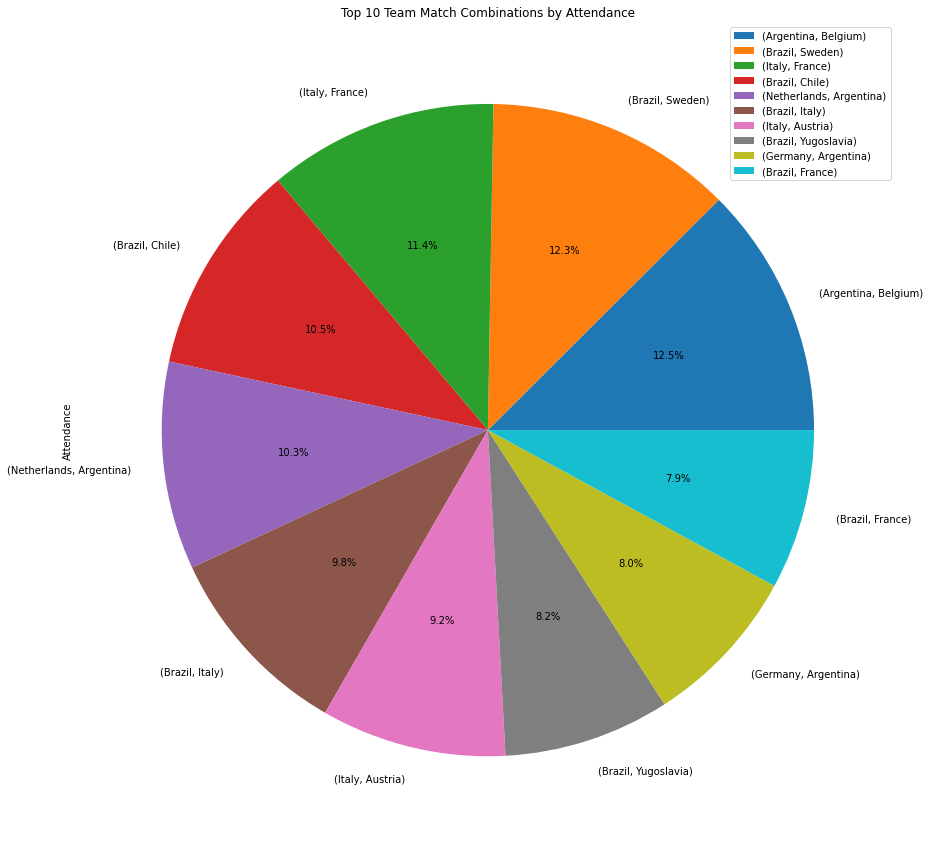

In [30]:
# plotting a pie chart of top 10 team match combinations by attendance
f, ax = plt.subplots(figsize=(15, 15))
fig6 = matches.groupby(['Home Team Name', 'Away Team Name']).sum().sort_values('Attendance', ascending=False).head(10).plot.pie(y='Attendance', ax=ax, autopct='%1.1f%%')
fig6.set_title('Top 10 Team Match Combinations by Attendance')

## *Which teams have won the most games? How has number of wins by country trended over time?*

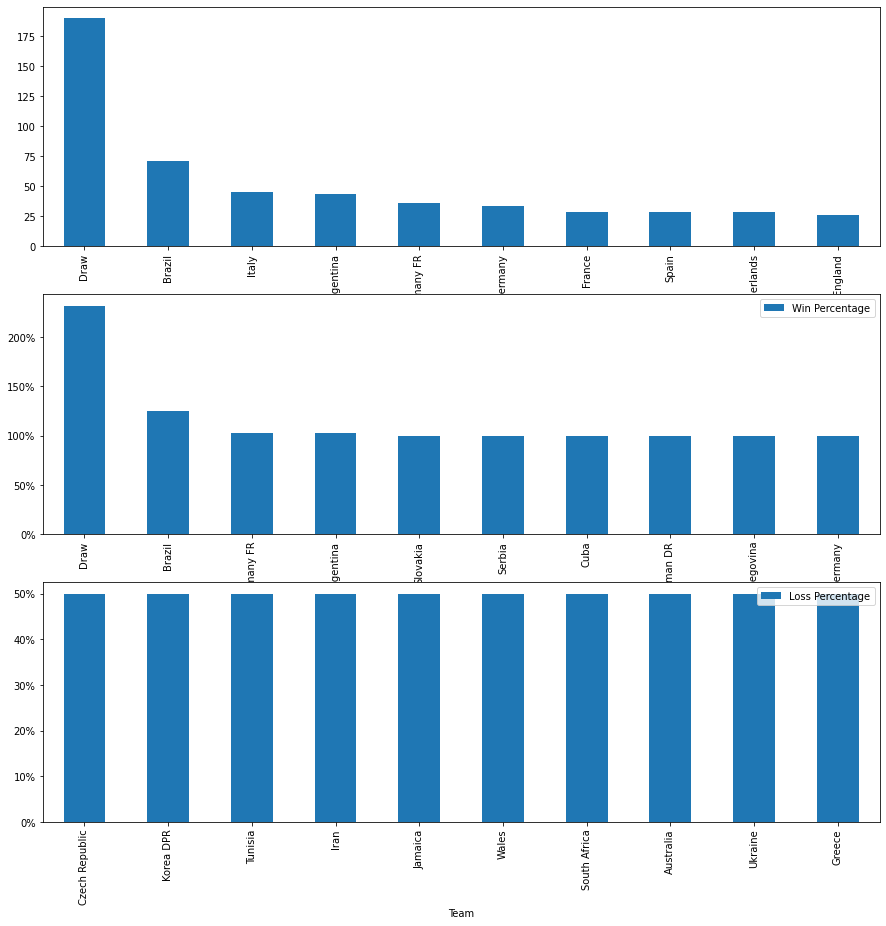

In [40]:
# first, since there is no winner column, we'll need to create one
matches['Winner'] = np.where(matches['Home Team Goals'] > matches['Away Team Goals'], matches['Home Team Name'], matches['Away Team Name'])

# if the match was a draw, we'll set the winner to 'Draw'
matches['Winner'] = np.where(matches['Home Team Goals'] == matches['Away Team Goals'], 'Draw', matches['Winner'])

# now we can plot the figures relating to winning

f,axes = plt.subplots(3, 1, figsize=(15, 15))

# plotting a raw count of wins by team, only showing the top 10
fig7 = matches['Winner'].value_counts().head(10).plot.bar(ax=axes[0])

# creating a temporary dataframe to store team name, team wins, team losses, team draws, and team total games
team_df = pd.DataFrame(matches['Winner'].value_counts().reset_index())
team_df.columns = ['Team', 'Wins']
team_df['Losses'] = matches['Home Team Name'].value_counts().reset_index()['Home Team Name'] - team_df['Wins']
team_df['Draws'] = matches['Home Team Name'].value_counts().reset_index()['Home Team Name'] - team_df['Wins'] - team_df['Losses']
team_df['Total Games'] = team_df['Wins'] + team_df['Losses'] + team_df['Draws']
team_df['Win Percentage'] = team_df['Wins'] / team_df['Total Games']
team_df['Loss Percentage'] = team_df['Losses'] / team_df['Total Games']
team_df['Draw Percentage'] = team_df['Draws'] / team_df['Total Games']

# plotting a bar chart of win percentage by team, only showing the top 10
fig8 = team_df.sort_values('Win Percentage', ascending=False).head(10).plot.bar(x='Team', y='Win Percentage', ax=axes[1])

# plotting a bar chart of loss percentage by team, only showing the top 10
fig9 = team_df.sort_values('Loss Percentage', ascending=False).head(10).plot.bar(x='Team', y='Loss Percentage', ax=axes[2])

# changing the y axis to a percentage
fig8.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:.0%}".format(x)))
fig9.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:.0%}".format(x)))

#TODO: check why brazil has a higher than 100% win percentage


## *Based on the Home Team and Away Team columns, does there seem to be a "home team advantage"?*

In [42]:
# pie chart of count of wins by home team vs away team
pass
#TODO: create this pie chart

## *Do any teams seem to be stronger in either the first half or the second half? (think about both offense and defense)*

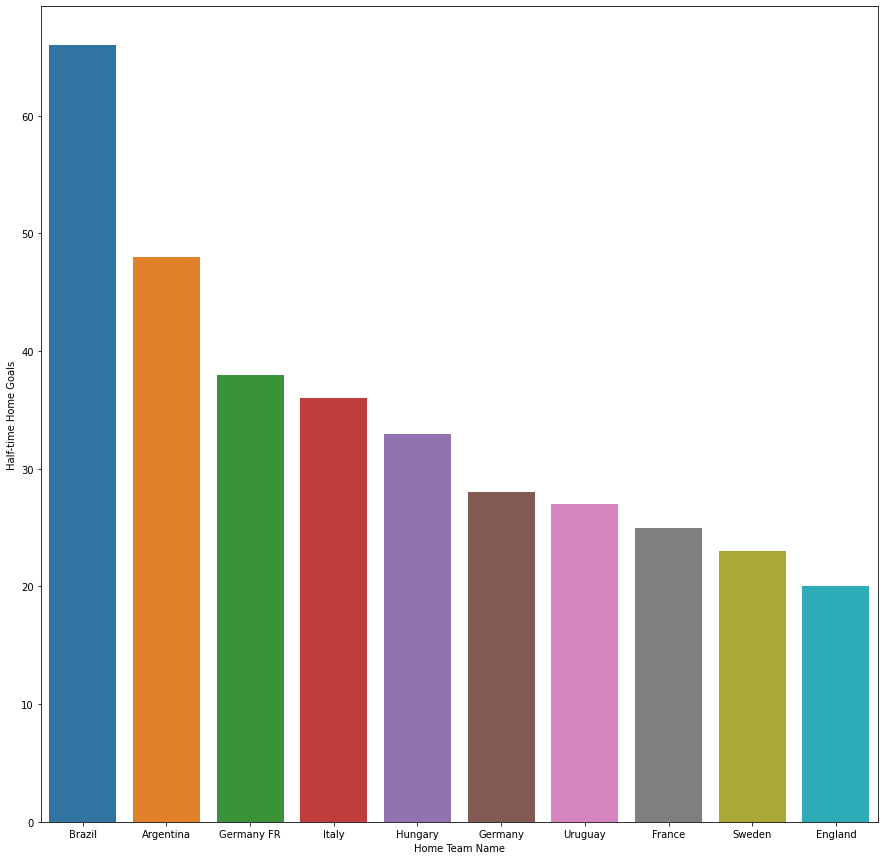

In [46]:
# bar chart of sum of half time goals by home v away, clustered bar chart
f, ax = plt.subplots(figsize=(15, 15))

# creating a temproary dataframe to store the sum of half time goals by team, whether they were home or away
team_Df2 = pd.DataFrame(matches.groupby(['Home Team Name', 'Half-time Home Goals', 'Half-time Away Goals']).sum().reset_index())
# top 10 teams by half time goals, and different bars for home and away



## *Which players had the most successful scoring careers? How about the longest careers?*